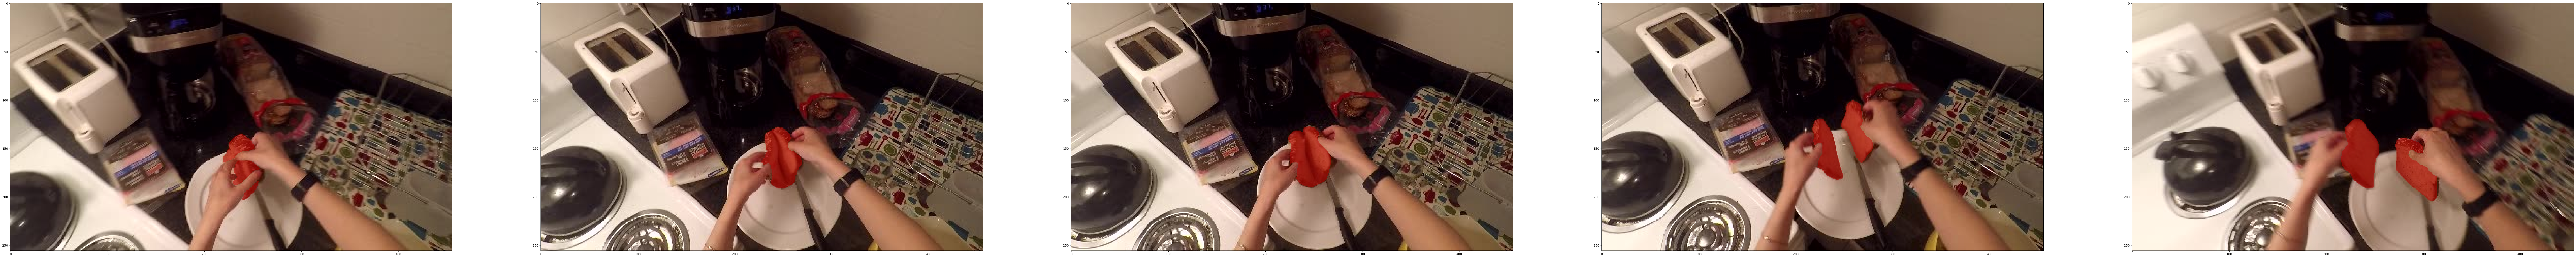

In [29]:
import pandas as pd
import numpy as np
import imageio
import os
from glob import glob
import matplotlib.pyplot as plt
import time
import sys
sys.path.append('..')
from inference.interact.interactive_utils import overlay_davis
from PIL import Image

validation = True
save_pdf = True
if not validation:
    data_path = '/home/venom/projects/XMem/EPIC_train'
else:
    data_path = '/home/venom/projects/XMem/val_data'

cols = 5
rows = 3
alpha = 0.5
key = 'P18_11_62'
PART = key.split('_')[0]
video_id = '_'.join(key.split('_')[:2])
anno_path = os.path.join(data_path, PART, 'anno_masks', video_id, key)
annoted_imgs = sorted(glob(f'{anno_path}/*.png'))
image_path = os.path.join(data_path, PART, 'rgb_frames', video_id, key)
rgb_imgs = sorted(glob(f'{image_path}/*.jpg'))

if validation:
    selected_annos = sorted(np.random.choice(annoted_imgs, size=min(len(annoted_imgs), cols), replace=False))
    cols = len(selected_annos)
else:
    selected_annos = sorted(np.random.choice(annoted_imgs, size=2, replace=False))
    reserve_need_to_select_num = cols - len(selected_annos)
    other_pics = sorted(np.random.choice(rgb_imgs[1:-1], size=reserve_need_to_select_num, replace=False))

images = []
fig, axes = plt.subplots(nrows=1, ncols=cols, figsize=(150, 150))
if validation:
    for i, frame_path in enumerate(selected_annos):
        rgb_path = os.path.join(data_path, PART, 'rgb_frames', video_id, key)
        raw_frame_path = os.path.join(rgb_path, frame_path.replace('png', 'jpg').split('/')[-1])
        img_anno_path = os.path.join(anno_path, frame_path.split('/')[-1])
        
        visualization = overlay_davis(np.array(Image.open(raw_frame_path)), np.array(Image.open(img_anno_path)), alpha=alpha)
        
        axes[i].imshow(visualization)
else:
    for i, frame_path in enumerate(selected_annos):
        rgb_path = os.path.join(data_path, PART, 'rgb_frames', video_id, key)
        raw_frame_path = os.path.join(rgb_path, frame_path.replace('png', 'jpg').split('/')[-1])
        img_anno_path = os.path.join(anno_path, frame_path.split('/')[-1])
        print(f"img anno path:{np.array(Image.open(img_anno_path).convert('1')).shape}")
        visualization = overlay_davis(np.array(Image.open(raw_frame_path)), np.array(Image.open(img_anno_path).convert('1')).astype(np.int32), alpha=alpha)
        if i == 0:
            axes[0].imshow(visualization)
        else:
            axes[cols-1].imshow(visualization)
    
    for i, frame_path in enumerate(other_pics):
        print(i+1)
        axes[i+1].imshow(np.array(Image.open(frame_path)))
if save_pdf:
    if validation:
        fig.savefig(f"../visuals/dataset_examples/val={validation}_{key}.svg")
    else:
        fig.savefig(f"../visuals/dataset_examples/val={validation}_{key}.svg")

plt.show()
